# K-th missing positive number (easy)

Given an array ```arr``` of positive integers sorted in a strictly increasing order, and an integer ```k```.

Return the kth positive integer that is missing from this array.

Example 1:
```
Input: arr = [2,3,4,7,11], k = 5
Output: 9
Explanation: The missing positive integers are [1,5,6,8,9,10,12,13,...]. The 5th missing positive integer is 9.
```
Example 2:
```
Input: arr = [1,2,3,4], k = 2
Output: 6
Explanation: The missing positive integers are [5,6,7,...]. The 2nd missing positive integer is 6.
```

Constraints:
```
1 <= arr.length <= 1000
1 <= arr[i] <= 1000
1 <= k <= 1000
arr[i] < arr[j] for 1 <= i < j <= arr.length
```

**Follow up question**
Could you solve this problem in less than O(n) complexity?

We are given an array which is sorted in strictly increasing order and a number
k. Our task is to find out the k-th positive missing number in the given array.

Example: [1,2,3,4], k = 2

Output: 6

Explanation:

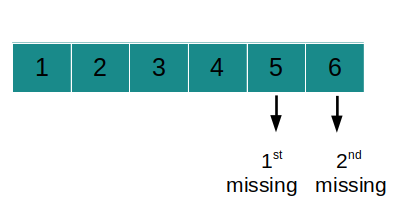

As in the given array, the first missing number is 5 and the second missing number is 6. So, the answer is 6.

## Brute Force approach



1.   Traverse the array
2.   Every time we will calculate the number of missing numbers.
3.   If the number of missing positive numbers is greater than or equal to k then we will return i + k.
4.   After the complete traversal of the array if the number of missing elements is less than k then we will return the size of the array + k.




In [ ]:
from typing import List
"""
O(n) where n = len(arr)

The array has only positive integers sorted in strict ascending order
(so the array theoretically starts from 1).
So ideally, the relationship between the number nums[i] and its corresponding
subscript i should be nums[i] = i + 1. So when scanning the input array, if the
difference between the number and its corresponding subscript is greater than 1,
it means that the number is missing in the middle. When the gap is greater than
or equal to K, the Kth missing number is found.

"""
def kth_missing_number_naive(arr: List[int], k: int) -> int:
  for i in range(len(arr)):
    x = arr[i] - (i+1)
    if x >= k:
      return i + k
  return len(arr) + k

The time complexity of the above code is **O(n)** because we are using a linear search that takes O(n) time in the worst case. Here n is the length of the given array.

The space complexity of the above code is **O(1)** because we are using only a variable to store answer.

## Binary Search approach


The time complexity of the above algorithm is O(n) because we may need to traverse the complete array in the worst case. We can improve the time complexity of the solution using a binary search in place of linear search.

1. Let's first define the range of our search for binary search. So start will be index 0 and end will be the last index of the given array
2.  We will find the mid index then we will check if the number of missing positive numbers is less than k:
3. then start will become mid + 1
4. else end will become mid

5. return end + k



In [ ]:
from typing import List
"""
O(log(len(arr)))

Let's use binary search. Because the input array is ordered, we can find the
midpoint in mid. Then we compare the current number on the index with the
difference between the index. If the difference is less than k, look for the
right half of the array; otherwise, look for the left half of the array.

"""
def kth_missing_number(arr: List[int], k: int) -> int:
  left, right = 0, len(arr)
  while left < right:
    mid = (left + right) // 2
    x = arr[mid] - (mid + 1)
    if x < k:
      left = mid + 1
    else:
      right = mid
  return left + k

The time complexity of the above code is **O(log n)** because we are using a binary search that takes O(logn) time in the worst case. Here n is the length of the given array.

The space complexity of the above code is **O(1)** because we are using only a variable to store answer.

# Search in Rotated Sorted Arrays (medium)

There is an integer array ```nums``` sorted in ascending order (with distinct values).

Prior to being passed to your function, ```nums``` is possibly rotated at an unknown pivot index ```k (1 <= k < nums.length)``` such that the resulting array is ```[nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]]``` (0-indexed). For example, ```[0,1,2,4,5,6,7]``` might be rotated at pivot index 3 and become ```[4,5,6,7,0,1,2]```.

Given the array ```nums``` after the possible rotation and an integer ```target```, return the index of ```target``` if it is in ```nums```, or -1 if it is not in ```nums```.

Example:

```
nums = [4,5,6,7,0,1,2]
target = 4

Output -> 0
```
You must write an algorithm with O(log n) runtime complexity.

## Brute Force approach

The simplest method hat one can think of is to try linear search. We simply traverse the given array and check if the current element is our target element. If the current element is the target element, we return the current index; else, we return -1. O(n) time complexity, O(1) space complexity

In [ ]:
from typing import List

def search_rotated_sorted_naive(nums: List[int], target: int) -> int:
  for i in range(len(nums)):
    if nums[i] == target:
      return i
  return -1

## Binary Search approach

The approach earlier mentioned did not use the fact that the array was a rotated sorted array. So, in this approach, we try to use this fact to reduce the time complexity. Consider, if we had a sorted array, we would have simply used binary search but in case this is a bit tricky. Here also we are required to used binary search. But if we use binary search, how do we get to know which part of the array to choose once we are at the middle element of the array? Because we cannot simply follow the original binary search algorithm because this is a rotated sorted array. So, there is a slight modification over the normal binary search.

So, typically in a binary search, we check if the current element(element at mid index) is same as target, then we return its index. This step remains same here. Other than that, if they are not same, we check if the pivot lies to the right of the current element or to the left. If it lies to the right, then we check if the target lies in non-rotated subarray, if it does we update the high else we update the low. Similarly, if the pivot lies to the left, again we check if the target lies in the non-rotated subarray, we update the low, else we update the high. And in the end, if we come out of the loop, we are sure that the target is not present in the given array.

In [ ]:
from typing import List

def search_rotated_sorted(nums: List[int], target: int) -> int:
  low, high = 0, len(nums)-1

  while low <= high:
    mid = (low + high)//2

    if nums[mid] == target:
      return mid
    elif nums[low] <= nums[mid]:
      if nums[low] <= target < nums[mid]:
        high = mid - 1
      else:
        low = mid + 1
    else:
      if nums[mid] < target <= nums[high]:
        low = mid + 1
      else:
        high = mid - 1

  return -1

# Data Stream as Dijoint intervals

Given a data stream input of non-negative integers ```a1, a2, ..., an```, summarize the numbers seen so far as a list of disjoint intervals.

Implement the ```SummaryRanges``` class:



*   ```SummaryRanges()``` Initializes the object with an empty stream.
*   ```addNum(value)``` Adds the integer value to the stream.
*   ```getIntervals()``` Returns a summary of the integers in the stream currently as a list of disjoint intervals ```[start_i, end_i]```. The answer should be sorted by ```start_i```.


Example:
```summaryRanges = SummaryRanges();
summaryRanges.addNum(1);      // arr = [1]
summaryRanges.getIntervals(); // return [[1, 1]]
summaryRanges.addNum(3);      // arr = [1, 3]
summaryRanges.getIntervals(); // return [[1, 1], [3, 3]]
summaryRanges.addNum(7);      // arr = [1, 3, 7]
summaryRanges.getIntervals(); // return [[1, 1], [3, 3], [7, 7]]
summaryRanges.addNum(2);      // arr = [1, 2, 3, 7]
summaryRanges.getIntervals(); // return [[1, 3], [7, 7]]
summaryRanges.addNum(6);      // arr = [1, 2, 3, 6, 7]
summaryRanges.getIntervals(); // return [[1, 3], [6, 7]]
```



In [5]:
from typing import List

class SummaryRanges:
  """
    In the __init__ method, we initialize an empty list to store the
    intervals seen so far
  """
  def __init__(self):
    self.intervals = []

  """
    In the addNum method, we iterate through the intervals in the list and find
    the index i of the first interval that either overlaps with the new number
    or comes after it. We then check if the new number can be merged with either
    the interval at index i or the interval before it (i-1). If it can be merged
    with the interval at index i, we update the start and end of that interval
    to include the new number. If it can be merged with the interval before it,
    we update the end of that interval to include the new number. Otherwise, we
    create a new interval containing only the new number and insert it at
    index i.
  """
  def addNum(self, val: int) -> None:
    n = len(self.intervals)
    i = 0
    while i < n and self.intervals[i][1] < val:
      i += 1
      
    if i < n and self.intervals[i][0] <= val:
      return
    if i > 0 and self.intervals[i-1][1] == val-1:
      self.intervals[i-1][1] = val
      if i < n and self.intervals[i][0] == val+1:
        self.intervals[i-1][1] = self.intervals[i][1]
        del self.intervals[i]
    elif i < n and self.intervals[i][0] == val+1:
      self.intervals[i][0] = val
    else:
      self.intervals.insert(i, [val, val])

  """
    In the getIntervals method, we simply return the list of intervals
    in sorted order.
  """
  def getIntervals(self) -> List[List[int]]:
    return self.intervals

The time complexity of this implementation is **O(n)**, where n is the number of elements added to the data stream. This is because in the worst case, we may need to iterate through all intervals in the list to find the correct position to insert or merge the new number. The space complexity is also **O(n)**, since we need to store all the intervals seen so far in the list.

In [6]:
summaryRanges = SummaryRanges()
summaryRanges.addNum(1)      
print(summaryRanges.getIntervals())
summaryRanges.addNum(3)      
print(summaryRanges.getIntervals())
summaryRanges.addNum(7)      
print(summaryRanges.getIntervals())
summaryRanges.addNum(2)      
print(summaryRanges.getIntervals())
summaryRanges.addNum(6)     
print(summaryRanges.getIntervals())

[[1, 1]]
[[1, 1], [3, 3]]
[[1, 1], [3, 3], [7, 7]]
[[1, 3], [7, 7]]
[[1, 3], [6, 7]]
